In [2]:
! which python

/data/data0/yushi/dgl_env/bin/python


In [3]:
import torch
import dgl

In [2]:
# loader = nocd.data.load_dataset('data/mag_cs.npz')
# loader = nocd.data.load_dataset('data/facebook_ego/fb_0.npz')
# A, X, Z_gt = loader['A'], loader['X'], loader['Z']
# N, K = Z_gt.shape

In [3]:
A

<347x347 sparse matrix of type '<class 'numpy.float32'>'
	with 5038 stored elements in Compressed Sparse Row format>

In [9]:
# g = dgl.DGLGraph()
dgl.DGLGraph(A)

DGLGraph(num_nodes=347, num_edges=5038,
         ndata_schemes={}
         edata_schemes={})

In [30]:
# g.from_scipy_sparse_matrix(A)
from dgl.data import CoraDataset

In [39]:
cora = CoraDataset()
dataset=cora

In [96]:
labels = dataset.labels
label_types = sorted(list(set(labels)))
num_labels = len(label_types)
colors = cm.Accent(np.linspace(0, 1, num_labels))

In [100]:
colors

array([[0.498 , 0.7882, 0.498 , 1.    ],
       [0.7451, 0.6824, 0.8314, 1.    ],
       [0.9922, 0.7529, 0.5255, 1.    ],
       [0.2196, 0.4235, 0.6902, 1.    ],
       [0.9412, 0.0078, 0.498 , 1.    ],
       [0.749 , 0.3569, 0.0902, 1.    ],
       [0.4   , 0.4   , 0.4   , 1.    ]])

In [78]:
%matplotlib notebook
%matplotlib inline
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
from   sklearn.decomposition import PCA
from   sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding, MDS, SpectralEmbedding
from   sklearn.preprocessing import StandardScaler

np.set_printoptions(suppress=True)
np.set_printoptions(precision=4)
plt_style = 'seaborn-colorblind'


def do_plot(X_fit, title=None, labels=None):
    dimension = X_fit.shape[1]
    label_types = sorted(list(set(labels)))
    num_labels = len(label_types)
    colors = cm.Accent(np.linspace(0, 1, num_labels))
    with plt.style.context(plt_style):
        fig = plt.figure(figsize=(10,10))
        if dimension == 2:
            ax = fig.add_subplot(111)
            for lab, col in zip(label_types, colors):
                ax.scatter(X_fit[labels==lab, 0],
                           X_fit[labels==lab, 1],
                           c=col)
#         elif dimension == 3:
#             ax = fig.add_subplot(111, projection='3d')
#             for lab, col in zip(label_types, colors):
#                 ax.scatter(X_fit[labels==lab, 0],
#                            X_fit[labels==lab, 1],
#                            X_fit[labels==lab, 2],
#                            c=col)
#         else:
#             raise Exception('Unknown dimension: %d' % dimension)
    plt.title(title)
    plt.show()

In [70]:
# TSNE?

In [6]:
num_dimensions = 3
num_clusters = 4
num_points = 100
cluster_separation = 6
centers = np.array([(0,0,0), (1,0,0), (0,1,0), (0,0,1)], dtype=float) * cluster_separation
data = np.zeros((num_clusters * num_points, num_dimensions), dtype=float)
labels = np.zeros(num_clusters * num_points, dtype=int)
for c in range(num_clusters):
    start = c * num_points
    end = start + num_points
    data[start:end, :] = np.random.randn(num_points, num_dimensions) + centers[c]
    labels[start:end] = c
data_df = pd.DataFrame(data, columns=('x','y','z'))
data_df['label'] = labels
data_df.head()

,x,y,z,label
0,-0.539458,1.168151,0.373882,0
1,-1.202901,-0.266808,-1.055901,0
2,-0.766474,-0.722074,-0.804808,0
3,0.765224,-1.602972,1.091625,0
4,0.678247,1.027388,0.790424,0


In [7]:
X = data_df.iloc[:,0:-1]
X_std = StandardScaler().fit_transform(X)
y = data_df['label'].values

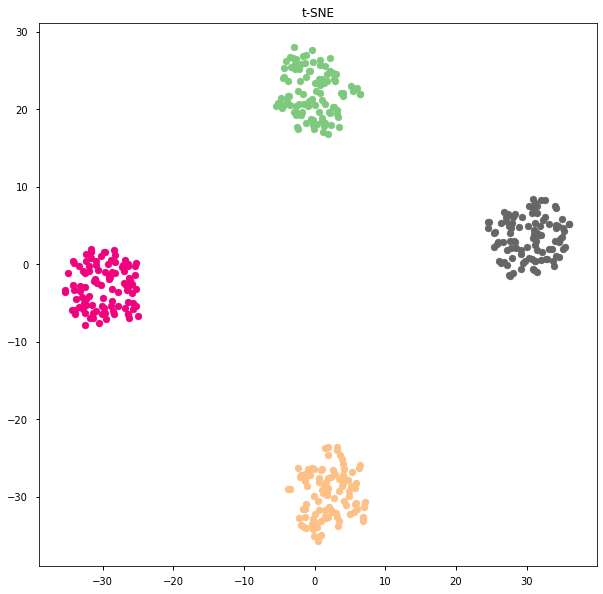

In [76]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
tsne2 = TSNE(n_components=2)
do_plot(tsne2.fit_transform(X), 't-SNE', y)

In [145]:
# dataset='data/facebook_ego/fb_414.npz'
# import helper
# loader = helper.data.load_dataset(dataset)
# A, features, Z_gt = loader['A'], loader['X'], loader['Z']
import numpy as np
x = np.load('hidden.npy')
label = dataset.labels
x.shape

(2708, 7)

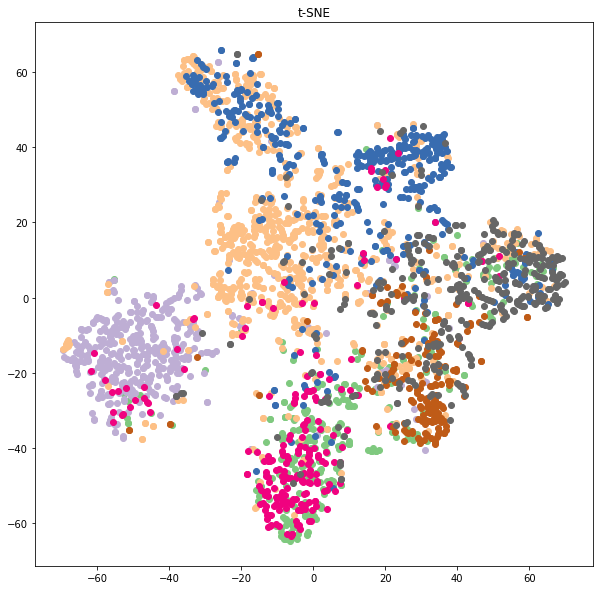

In [147]:
# y_cluster = np.array(list(range(x.shape[0])))
# x=hidden
# x.shape
tsne_transform = tsne2.fit_transform(x)
do_plot(tsne_transform, 't-SNE', label)

In [66]:
tsne_transform

array([[  7.2644,  35.6114],
       [-34.0526, -10.1874],
       [-44.6059,  37.0468],
       ...,
       [  7.4649, -45.8622],
       [-32.9256, -36.8715],
       [ 29.0524,  11.6617]], dtype=float32)

In [85]:
cora_nxgraph = cora.graph
import networkx as nx

In [125]:
colors_map = colors[labels]
colors_map[0]

array([0.9922, 0.7529, 0.5255, 1.    ])

In [129]:
# tsne_transform.tolist()
def get_pos(tsne_map):
    return dict(zip(range(tsne_map.shape[0]), tsne_transform.tolist()))
# get_pos(tsne_transform)

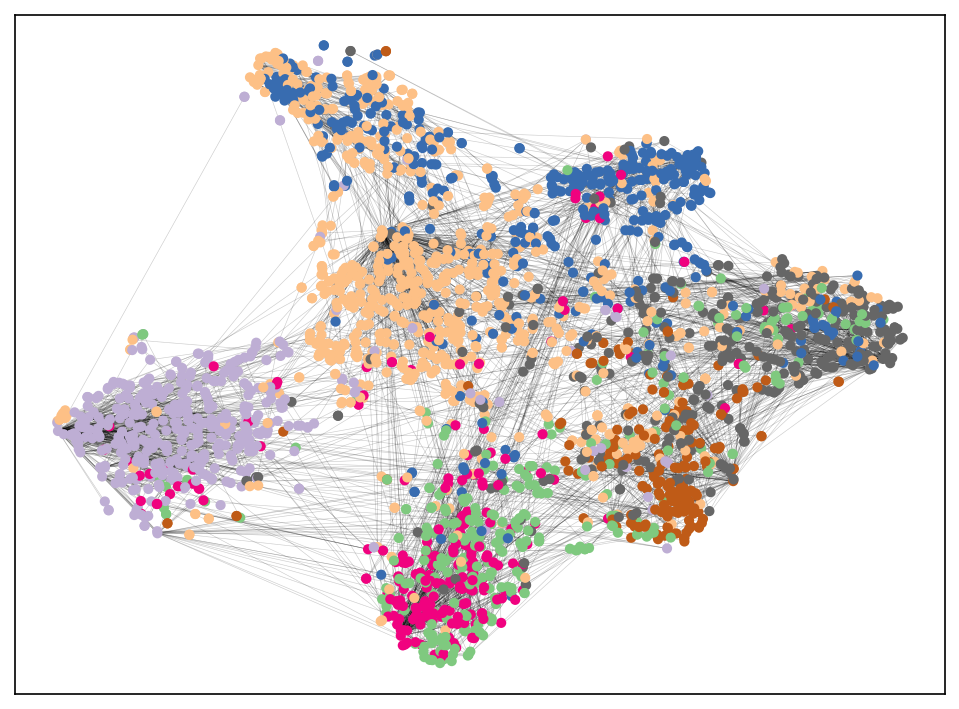

In [151]:
# layout = nx.drawing.spring_layout(cora_nxgraph)
from matplotlib.pyplot import figure
figsize=(8, 6)
figure(num=None, figsize=figsize, dpi=150, facecolor='w', edgecolor='k')
nx.draw_networkx_nodes(cora_nxgraph, with_labels=False, node_color=colors_map,node_size=15,pos=get_pos(tsne_transform),arrows=False)
nx.drawing.nx_pylab.draw_networkx_edges(cora_nxgraph, with_labels=False, node_color=colors_map,node_size=20,pos=get_pos(tsne_transform),arrows=False,width=0.3,alpha=0.1)

/data/data0/yushi/dgl_env/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


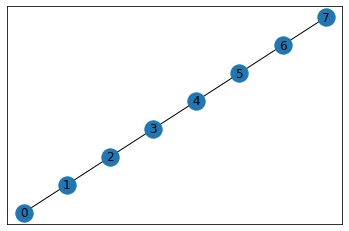

In [131]:
# plt.style.available
G = nx.path_graph(8)
nx.draw_networkx(G,pos=pos)
plt.show()

In [119]:
pos = [(i,i) for i in range(8)]
pos = dict(zip(range(8), pos))
pos

{0: (0, 0),
 1: (1, 1),
 2: (2, 2),
 3: (3, 3),
 4: (4, 4),
 5: (5, 5),
 6: (6, 6),
 7: (7, 7)}